In [21]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
from natsort import natsorted
import matplotlib.pyplot as plt

# Set the directory where the XML files are located
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/data")

# Get a list of the XML files in the directory
xml_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith(".xml")]

# Initialize an empty dictionary to hold the RNAexpression data
rna_expression_data = {}
tissue_organ = {}

# Loop through each XML file
for xml_file in xml_files:

    # Parse the XML file
    tree = ET.parse(xml_file)

    # Get the root element of the XML file
    root = tree.getroot()

    # Find the tag wih the desired expression level entries
    rna_expression = root.find("./entry/rnaExpression[@assayType='consensusTissue']")
    
    # Loop through each data child tag of the rnaExpression tag
    for data in rna_expression.iter("data"):
        # Get the name of the tissue type
        tissueName = data.find('tissue').text
        # Get the organ name for organization
        organName = data.find('tissue').get('organ')
        # Get the nTPM value from tissue type
        expRNA_value = data.find("./level[@type='normalizedRNAExpression']").get('expRNA')
        expRNA_value = float(expRNA_value)
        # Add the tag name and value to the dictionary
        if tissueName not in rna_expression_data:
            rna_expression_data[tissueName] = expRNA_value
            tissue_organ[tissueName] = organName
        else: raise Exception('a tissue type was found twice')

    # Convert the dictionary to a Pandas dataframe
    protName = root.find('entry').find('name').text
    try:
        rna_expression_df[protName] = rna_expression_data
    except NameError:
        rna_expression_df = pd.DataFrame.from_dict(rna_expression_data, orient='index', columns=[protName])
        rna_expression_df['organ'] = tissue_organ
    # Empty the dict before the new file
    rna_expression_data = {}


# Sort the cols alphabetically
order = natsorted(list(rna_expression_df.columns))
rna_expression_df = rna_expression_df.reindex(order, axis=1)
# sort the rows according to organtype
rna_expression_df = rna_expression_df.sort_values('organ', axis=0)
# Save the resulting dataframe
rna_expression_df.to_csv(f'{directory}/tissueProtTable.csv')
rna_expression_df

,ICMT,PLEK,RCE1,SPTLC1,SPTLC2,SPTSSA,ZDHHC1,ZDHHC2,ZDHHC3,ZDHHC4,...,ZDHHC16,ZDHHC17,ZDHHC18,ZDHHC19,ZDHHC20,ZDHHC21,ZDHHC22,ZDHHC23,ZDHHC24,organ
Tonsil,11.0,118.2,6.1,34.4,13.3,13.0,0.8,11.7,33.3,19.4,...,15.1,11.4,20.9,0.0,19.5,6.1,0.0,3.8,3.0,Bone marrow & Lymphoid tissues
Thymus,14.9,33.7,9.5,25.9,10.3,8.5,0.6,12.7,26.9,18.6,...,12.6,14.9,14.7,0.0,22.6,2.6,0.0,1.2,3.1,Bone marrow & Lymphoid tissues
Appendix,13.6,99.4,7.2,27.3,12.6,21.1,1.8,11.0,25.7,16.2,...,10.2,12.1,27.4,0.3,17.6,4.6,0.0,3.0,3.3,Bone marrow & Lymphoid tissues
Bone marrow,4.0,604.8,20.9,23.3,33.7,5.7,0.2,31.7,82.8,18.8,...,6.8,23.7,113.9,0.2,30.0,2.5,0.0,1.2,5.0,Bone marrow & Lymphoid tissues
Spleen,9.1,93.5,12.0,26.3,19.6,13.2,14.9,10.7,29.6,17.9,...,14.5,14.4,31.3,1.5,16.1,5.5,0.0,2.4,7.2,Bone marrow & Lymphoid tissues
Lymph node,10.2,129.9,9.9,25.7,12.0,12.2,1.4,9.3,21.9,20.6,...,11.3,14.8,22.1,0.0,18.0,6.6,0.0,2.8,4.3,Bone marrow & Lymphoid tissues
Hippocampal formation,12.5,4.9,14.7,24.3,15.3,12.6,3.4,8.0,25.8,17.8,...,18.1,19.8,25.4,0.2,12.0,6.0,21.2,7.4,4.9,Brain
Choroid plexus,17.7,6.5,13.7,28.6,9.9,13.8,7.4,13.5,25.8,21.1,...,16.4,11.8,16.9,0.0,0.0,2.2,0.0,13.2,5.8,Brain
Amygdala,12.4,4.9,14.9,24.0,14.6,13.5,3.7,10.3,23.0,17.5,...,17.8,18.6,26.0,0.1,15.2,4.7,14.9,5.4,5.8,Brain
Cerebral cortex,13.1,10.0,18.2,34.2,19.4,17.9,5.6,14.8,22.9,18.8,...,21.9,25.9,29.0,0.1,23.3,6.7,33.8,9.4,5.4,Brain


In [22]:
# genereate a subset of tissues of high interest for a more compact figure
smaller_rna_expression_df = rna_expression_df[rna_expression_df['organ'].isin(['Bone marrow & Lymphoid tissues', 'Pancreas', 'Brain', 'Endocrine tissues'])]
smaller_rna_expression_df

,ICMT,PLEK,RCE1,SPTLC1,SPTLC2,SPTSSA,ZDHHC1,ZDHHC2,ZDHHC3,ZDHHC4,...,ZDHHC16,ZDHHC17,ZDHHC18,ZDHHC19,ZDHHC20,ZDHHC21,ZDHHC22,ZDHHC23,ZDHHC24,organ
Tonsil,11.0,118.2,6.1,34.4,13.3,13.0,0.8,11.7,33.3,19.4,...,15.1,11.4,20.9,0.0,19.5,6.1,0.0,3.8,3.0,Bone marrow & Lymphoid tissues
Thymus,14.9,33.7,9.5,25.9,10.3,8.5,0.6,12.7,26.9,18.6,...,12.6,14.9,14.7,0.0,22.6,2.6,0.0,1.2,3.1,Bone marrow & Lymphoid tissues
Appendix,13.6,99.4,7.2,27.3,12.6,21.1,1.8,11.0,25.7,16.2,...,10.2,12.1,27.4,0.3,17.6,4.6,0.0,3.0,3.3,Bone marrow & Lymphoid tissues
Bone marrow,4.0,604.8,20.9,23.3,33.7,5.7,0.2,31.7,82.8,18.8,...,6.8,23.7,113.9,0.2,30.0,2.5,0.0,1.2,5.0,Bone marrow & Lymphoid tissues
Spleen,9.1,93.5,12.0,26.3,19.6,13.2,14.9,10.7,29.6,17.9,...,14.5,14.4,31.3,1.5,16.1,5.5,0.0,2.4,7.2,Bone marrow & Lymphoid tissues
Lymph node,10.2,129.9,9.9,25.7,12.0,12.2,1.4,9.3,21.9,20.6,...,11.3,14.8,22.1,0.0,18.0,6.6,0.0,2.8,4.3,Bone marrow & Lymphoid tissues
Hippocampal formation,12.5,4.9,14.7,24.3,15.3,12.6,3.4,8.0,25.8,17.8,...,18.1,19.8,25.4,0.2,12.0,6.0,21.2,7.4,4.9,Brain
Choroid plexus,17.7,6.5,13.7,28.6,9.9,13.8,7.4,13.5,25.8,21.1,...,16.4,11.8,16.9,0.0,0.0,2.2,0.0,13.2,5.8,Brain
Amygdala,12.4,4.9,14.9,24.0,14.6,13.5,3.7,10.3,23.0,17.5,...,17.8,18.6,26.0,0.1,15.2,4.7,14.9,5.4,5.8,Brain
Cerebral cortex,13.1,10.0,18.2,34.2,19.4,17.9,5.6,14.8,22.9,18.8,...,21.9,25.9,29.0,0.1,23.3,6.7,33.8,9.4,5.4,Brain


In [23]:
'''
Split the df in two parts, rename the ZDHHC columns in one of them.
'''
rna_expression_df1 = rna_expression_df.iloc[:,:6]
rna_expression_df1['ZDHHC17'] = rna_expression_df['ZDHHC17']
rna_expression_df_zinc = rna_expression_df.iloc[:,6:-1]
newNames = {}
for n in list(rna_expression_df_zinc.columns):
    nn = n[5:]
    newNames[n] = nn
rna_expression_df_zinc = rna_expression_df_zinc.rename(newNames, axis=1)

smaller_rna_expression_df1 = smaller_rna_expression_df.iloc[:,:6]
smaller_rna_expression_df1['ZDHHC17'] = smaller_rna_expression_df['ZDHHC17']
smaller_rna_expression_df_zinc = smaller_rna_expression_df.iloc[:,6:-1]
newNames = {}
for n in list(smaller_rna_expression_df_zinc.columns):
    nn = n[5:]
    newNames[n] = nn
smaller_rna_expression_df_zinc = smaller_rna_expression_df_zinc.rename(newNames, axis=1)


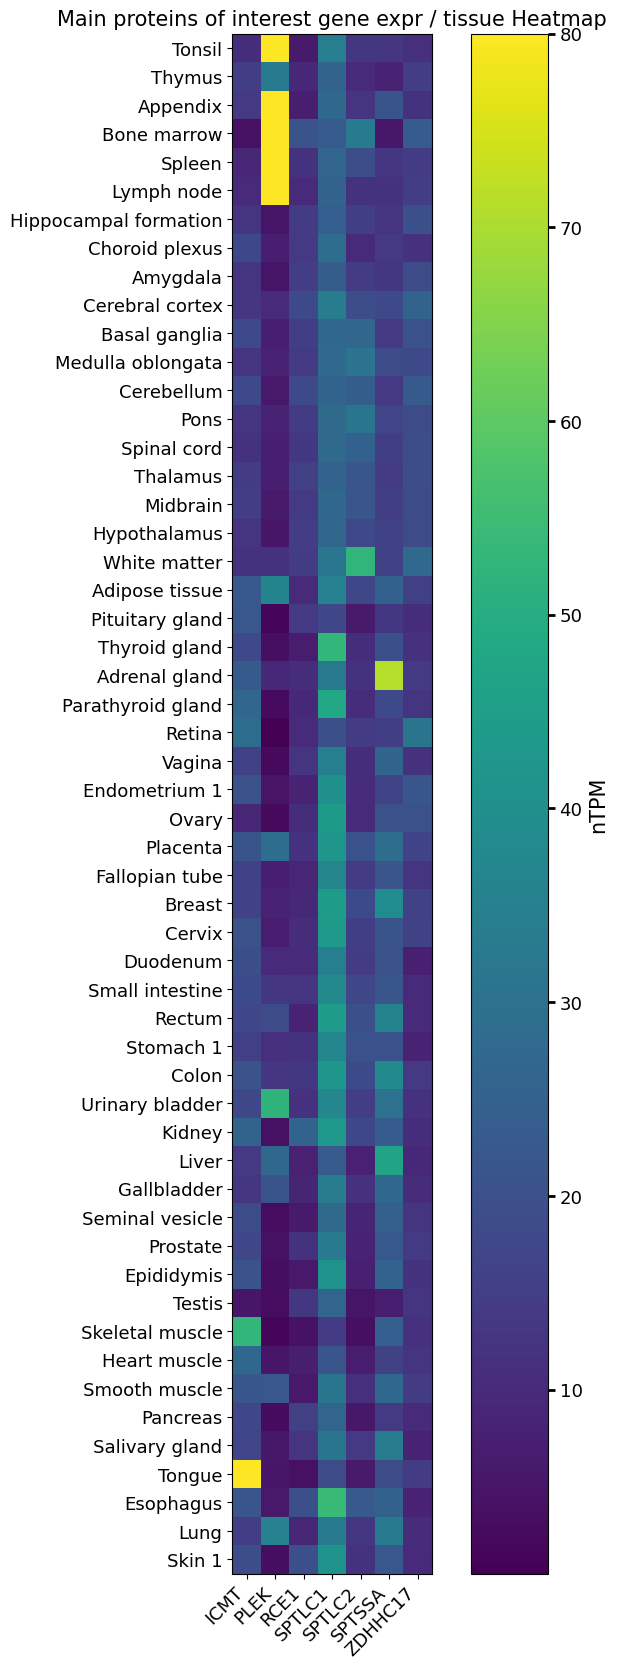

In [24]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 20))
df = rna_expression_df1
im = ax.imshow(df, cmap='viridis', vmax = 80)

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Heatmap of main proteins of interest gene expr / tissue', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/mainProts.pdf')


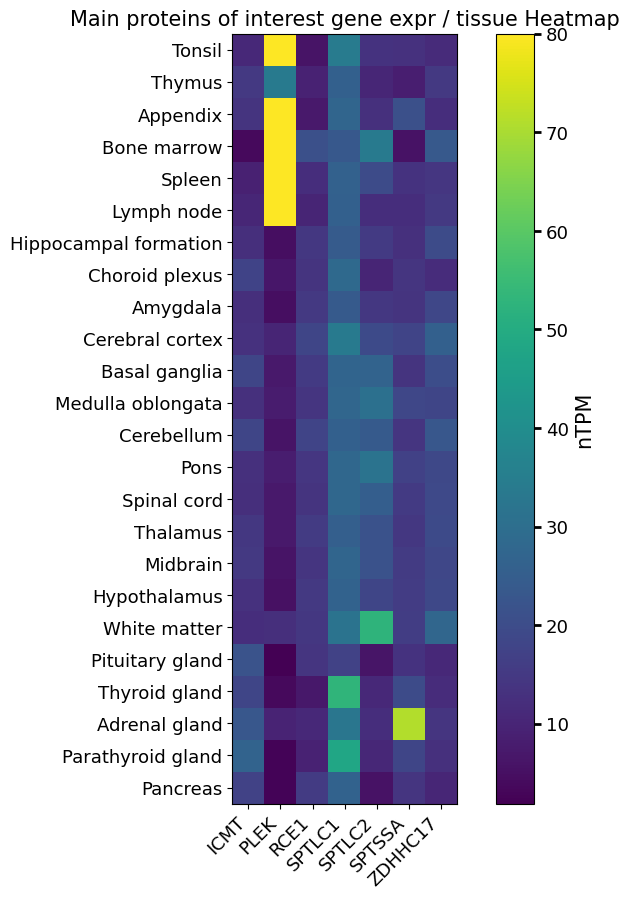

In [36]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
df = smaller_rna_expression_df1
im = ax.imshow(df, cmap='viridis', vmax = 80)

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Main proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/mainProts_selectedTissues.pdf')


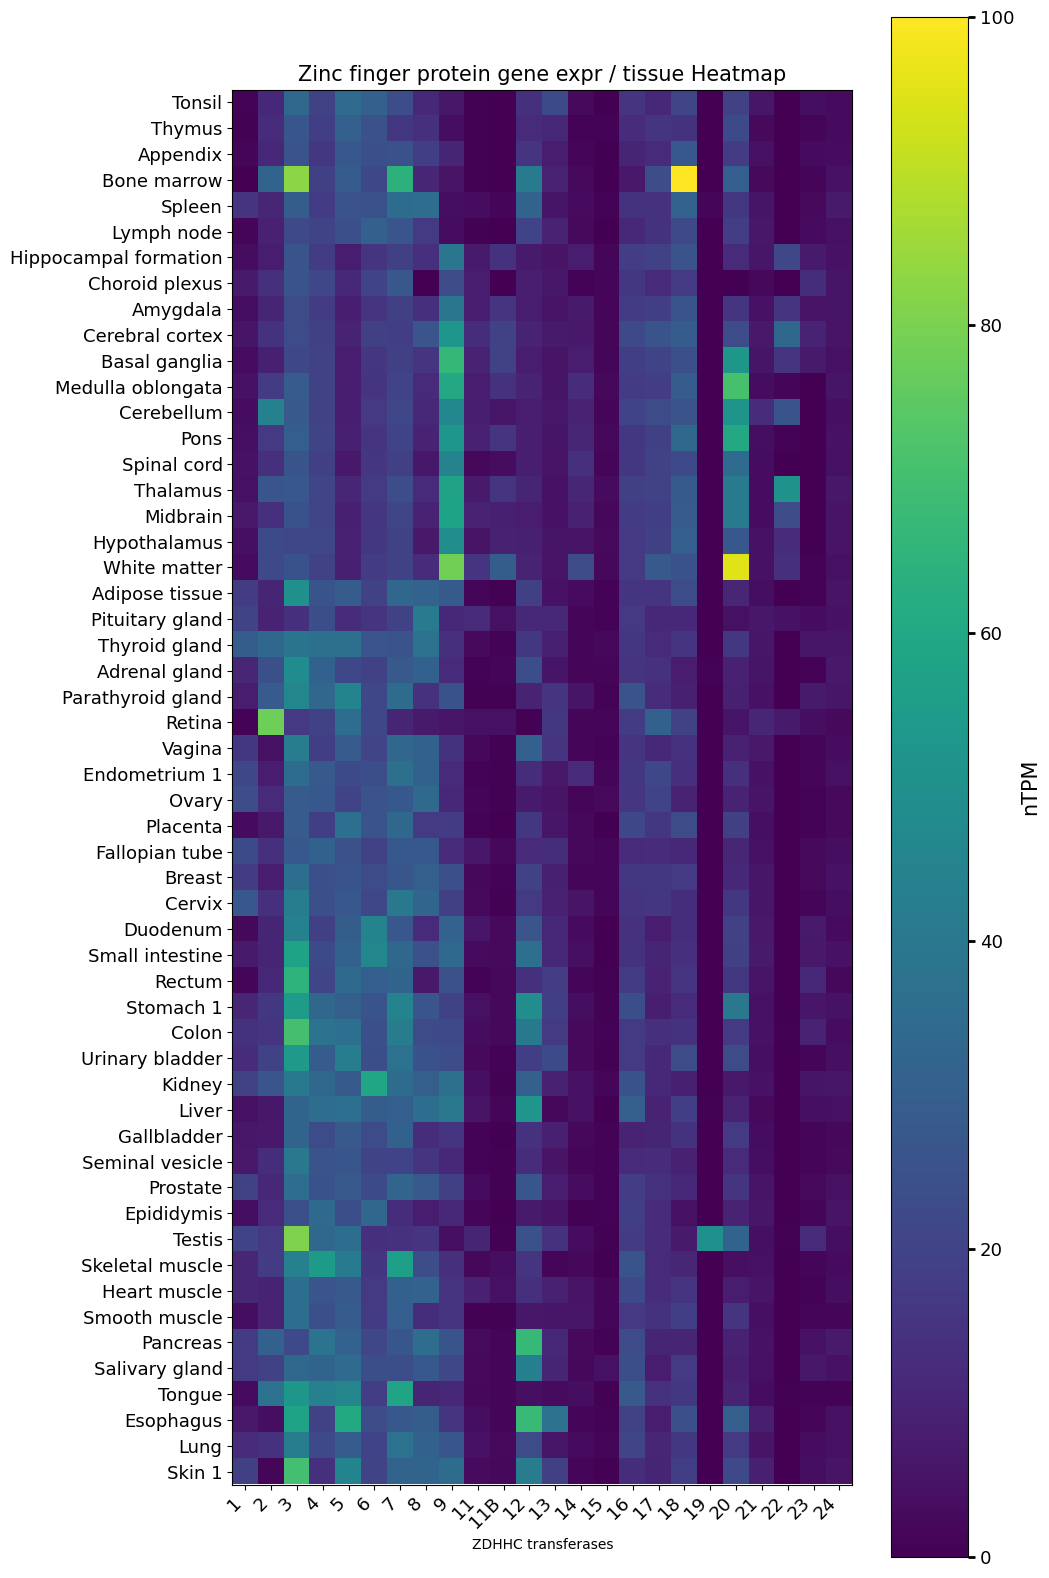

In [27]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 20))
df = rna_expression_df_zinc
im = ax.imshow(df, cmap='viridis', vmax = 100)

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_xlabel('ZDHHC transferases')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Zinc finger protein gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
fig.savefig(f'{directory}/plots/zincProts.pdf')


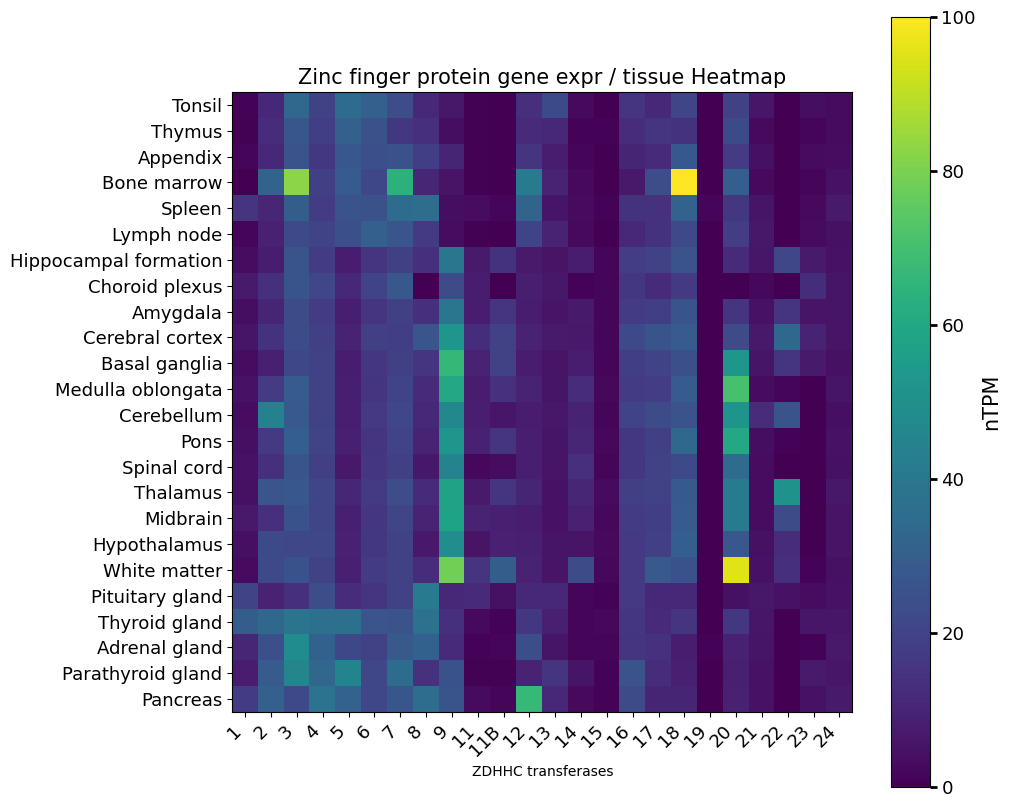

In [30]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
df = smaller_rna_expression_df_zinc
im = ax.imshow(df, cmap='viridis', vmax = 100)

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_xlabel('ZDHHC transferases')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Zinc finger protein gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
fig.savefig(f'{directory}/plots/zincProts_selectedTissues.pdf')
